# **Punto 2 del taller**

Integrantes:
*   Yeison Idarraga Chavarria
*   Juan Camilo Agudelo Aquite



# Importar librerias necesarias y montar la data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from matplotlib import cm

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Colab Notebooks/IA/RegresionLogistica_2_variables/"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/IA/RegresionLogistica_2_variables


# Cargar data y tomar tamaño de los datos de entrenamiento

In [ ]:
data = np.loadtxt("datos3.txt",delimiter=',',skiprows=0,usecols=[0,1,2],dtype='float')
dataSize = data.shape
X1 = data[:, 0]
X2 = data[:, 1]
Y = data[:, 2]
m = Y.shape
print('Tamaño de datos de entrenamiento:',m[0])
print(dataSize)

Tamaño de datos de entrenamiento: 100
(100, 3)


# Normalizar la data cargada (solo X1 y X2)

In [ ]:
promX = np.mean(data[:, :2], axis=0)
stdX = np.std(data[:, :2], axis=0)

dataNormalizada = np.zeros((dataSize[0], dataSize[1]-1))
for i in range(dataSize[0]):
    for j in range(2):
        dataNormalizada[i, j] = (data[i, j] - promX[j]) / stdX[j]

dataNormalizada = np.column_stack((dataNormalizada, data[:, 2]))

# Segregar datos de entrenamiento

Tamaño de data con Y = 0: (40, 3)
Tamaño de data con Y = 1: (60, 3)


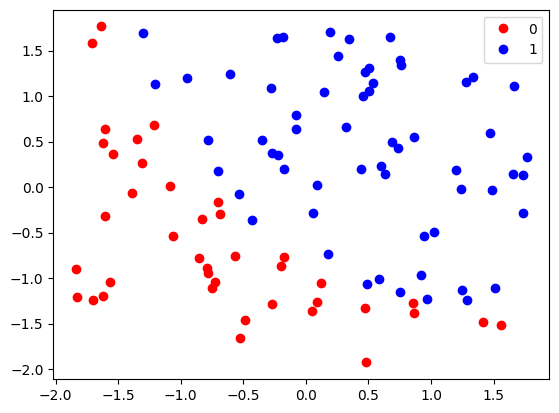

In [ ]:
dataConY0 = dataNormalizada[dataNormalizada[:, 2] == 0] # Filtrar las filas donde la Y es igual a 0
dataConY1 = dataNormalizada[dataNormalizada[:, 2] == 1] # Filtrar las filas donde la Y es igual a 1

print('Tamaño de data con Y = 0:', dataConY0.shape)
print('Tamaño de data con Y = 1:', dataConY1.shape)

plt.plot(dataConY0[:, 0],dataConY0[:, 1],'o', color = 'red', label = '0')
plt.plot(dataConY1[:, 0],dataConY1[:, 1],'o', color = 'blue', label = '1')
plt.legend()
plt.show()

# Inicializar los Beta, crear X y Y

In [ ]:
Beta = np.zeros((3,1)) # Beta es un vector de 3 filas 1 columna, almacenará a B0, B1 y B2
onesVector = np.ones((dataSize[0],)) # Crea un vector de unos del tamaño de datazise[0]

# Crea la matriz X
X = np.column_stack((onesVector,dataNormalizada[:,0],dataNormalizada[:,1]))

# Crea un vector de 0's de m filas y 1 columna
y = np.zeros((dataSize[0],1))

# Se asignan las salidas al vector y
y[:,0] = data[:,2]

# Función Gradiente Descendente

In [ ]:
def Gradiente(Beta,alpha,m,X,y,numIter,J):
  betaTemp = np.zeros((3,1))
  h = np.zeros((m,1))
  betaPrint = np.zeros((numIter,3))

  for i in range(numIter):
    for j in range(3): # Con j=0 se calcula B0, j=1 se calcula B1 y j= 2 calcula B2
      z = np.dot(X,Beta)
      h = (1 / (1 + np.exp(-z)))
      temp1 = (np.reshape(X[:,j],(m,1)))

      temp_diff = np.subtract(h, y)

      temp2 = np.sum(np.multiply(temp1,temp_diff))

      betaTemp[j,0] = (Beta[j,0] - (temp2*(alpha/m))) + (Beta[j,0] / m)
      betaPrint[i,j] = betaTemp[j,0]

    Beta = betaTemp
    z = np.dot(X,Beta)

  return (Beta)

In [ ]:
alpha = 0.01
numIter = 500
m = m[0] # Cantidad de datos de entrenamiento
J = np.zeros((numIter,1))
Beta = np.zeros((3,1))

Beta = Gradiente(Beta,alpha,m,X,y,numIter,J)
print('Beta0: ', Beta[0])
print('Beta1: ', Beta[1])
print('Beta2: ', Beta[2])

Beta0:  [9.88797631]
Beta1:  [27.1119034]
Beta2:  [24.41650942]


# Graficar línea que separa las 2 clases

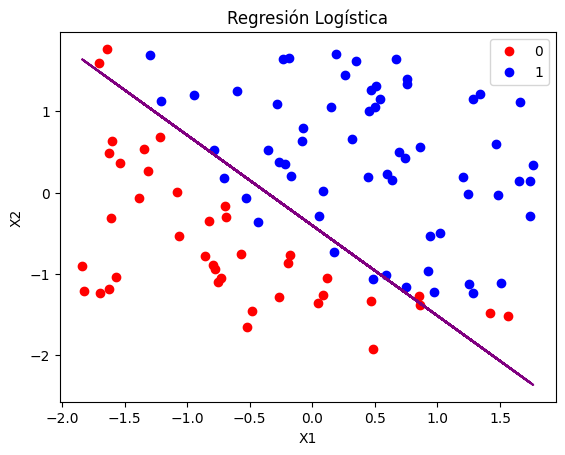

In [ ]:
plt.plot(dataConY0[:, 0], dataConY0[:, 1], 'o', color='red', label='0')
plt.plot(dataConY1[:, 0], dataConY1[:, 1], 'o', color='blue', label='1')

# Coeficientes encontrados por el cálculo del gradiente descendente
B0 = Beta[0]
B1 = Beta[1]
B2 = Beta[2]

X1_Normalizado = dataNormalizada[:, 0]
X2_Normalizado = dataNormalizada[:, 1]

X2New = np.zeros((dataNormalizada.shape[0],1))

#Ecuación de recta
X2New[:,0] = (-B0 - B1 * np.array(X1_Normalizado)) / B2

plt.plot(X1_Normalizado, X2New, c='purple')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Regresión Logística')
plt.legend()
plt.show()



# Evaluación de desmpeño de la clasificación con regresión logística

In [ ]:
Yc = np.zeros((dataNormalizada.shape[0],1))
YcNew = np.zeros((dataNormalizada.shape[0],1))

#Calcular valores de Yc según la ecuación Y = B0 + B1X1 + B2X2
Yc[:,0] = B0 + B1 * np.array(X1_Normalizado) + B2 * np.array(X2_Normalizado)

for i in range(Yc.shape[0]):
    if Yc[i, 0] >= 0:
        YcNew[i, 0] = 1
    else:
        YcNew[i, 0] = 0

tn = 0
fn = 0
tp = 0
fp = 0

for i in range(YcNew.shape[0]):
    if y[i,0] == 0 and YcNew[i, 0] == 0: # Verdaderos negativos
        tn = tn +1
    elif y[i,0] == 0 and YcNew[i, 0] == 1: # falso positivo
        fp = fp +1
    elif y[i,0] == 1 and YcNew[i, 0] == 1: # Verdadero positivo
        tp = tp +1
    else:
        fn = fn +1

print('Falsos negativos (FN):', fn)
print('Falsos positivos (FP):', fp)
print('Verdaderos negativos (TN):', tn)
print('Verdaderos positivos (TP):', tp)


Falsos negativos (FN): 5
Falsos positivos (FP): 5
Verdaderos negativos (TN): 35
Verdaderos positivos (TP): 55


In [ ]:
#Presición y recall

p = tp / (tp + fp)
r = tp / (tp + fn)
fpr = fp / (tn + fp)
e = (fp + fn) / YcNew.shape[0]
accuracy = (tp + tn) / YcNew.shape[0]

print('Presición (P):', p)
print('Recall (R):', r)
print('Tasa FP (FPR):', fpr * 100,'%')
print('Error (E):', e)
print('Accuracy:', accuracy)


Presición (P): 0.9166666666666666
Recall (R): 0.9166666666666666
Tasa FP (FPR): 12.5 %
Error (E): 0.1
Accuracy: 0.9


Parte 3

1.En máximo 300 palabras indique ¿Cuál es la diferencia entre un aprendizaje supervisado y uno no supervisado? ¿En qué tipos de problemas se pueden utilizar estos aprendizajes?

R/= En un aprendizaje supervisado se hayan los valores de los BETA para poder tener la ecuación completa. En este, se entrena al modelo con un conjunto de datos de entrada y de salida conocidos. El modelo aprende a partir de estos datos etiquetados y utiliza esta información para predecir las salidas para nuevos datos de entrada. Es decir, el modelo recibe una guía o supervisión externa para aprender a clasificar los datos.

Los tipos de problemas en los que se pueden usar estos aprendizajes supervisados son:  La regresión lineal, el análisis discriminante, el árbol de decisión, la red neuronal, entre otros.
En cambio, en el aprendizaje no supervisado, el modelo no tiene acceso a la salida deseada. El objetivo es encontrar patrones y estructuras en los datos de entrada, sin necesidad de etiquetarlos. Es decir, el modelo debe aprender por sí mismo cómo agrupar los datos.
Los tipos de problemas en los que se pueden usar estos aprendizajes no supervisados son: El clustering, la reducción de dimensionalidad, la detección de anomalías, entre otros.
